### 感知机（原形式）

#### 代码

[[-4. ]
 [-3.5]] [17]


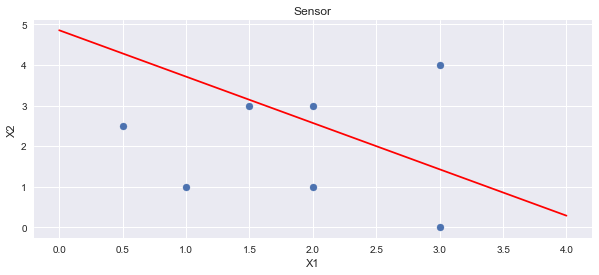

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# 数据准备
X1 = np.array([[3,4],[.5,2.5],[2,3],[2,1],[1,1],[3,0],[1.5,3]])
Y1 = np.array([-1,1,-1,1,1,1,1]).reshape(len(X1),1)
W1 = np.zeros((2,1))
b1 = 0
# ----------------------------------------------------------------
# 主函数
def Sencor(X,Y,W,b):
    while not (((np.dot(X,W)+b)*Y > 0)==True).all() :
        for i in range(len(X)):
            if (np.dot(X[i,:], W)+b)*Y[i] >0:
                continue
            else:
                W = W + (Y[i]*X[i]).reshape(2,1)
                b = b + Y[i]
    return W,b
W1, b1 = Sencor(X1,Y1,W1,b1)
# ----------------------------------------------------------------
# 结果图显
x1 = np.array([0,4])
y1 = (-b1 - W1[0]*x1)/W1[1]
print(W1, b1)
plt.figure(figsize=(10,4))
plt.title("Sensor")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X1[:,0],X1[:,1])
plt.plot(x1,y1,c="red")
plt.show()

#### 总结

### 感知机（对偶形式）

#### 代码

[-1.5 -1.5] [7]


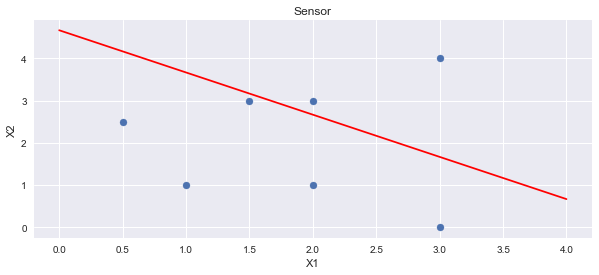

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# 数据准备
X2 = X1[::-1]      # X1 是原形式感知机的数据
gram = np.dot(X2, X2.T)
Y2 = Y1[::-1].reshape(len(X2), 1)     # Y1 是原形式感知机的数据
alpha = np.zeros((len(X2),1))
b2 = 0
# ------------------------------------------------------------------------
# 主函数
def Sensor_dual(X, Y, gram, alpha, b):
    while True:                    # 相当于 java 中的 do... while 语句，先执行一遍再判断
        total = np.zeros((len(Y),1))
        for i in range(len(Y)):
            sum_part_w = 0.0
            # 计算 W * x + b 部分 
            for j in range(len(Y)):
                sum_part_w += alpha[j] * Y[j] * gram[j][i]    #  计算 W * x 部分              
                total[i] = sum_part_w + b
            if Y[i] * total[i] <= 0:
                alpha[i] += 1
                b += Y[i]
        # 跳出循环判断
        if (Y * total > 0).all():
            break
    # 计算 W 值
    W = 0
    for i in range(len(Y)):
        W += alpha[i] * Y[i] * X[i]
    return W, b
W,b  = Sensor_dual(X2, Y2, gram, alpha, b2)
print(W,b)
# --------------------------------------------------------------------------
# 结果图示
x2 = np.array([0,4])
y2 = (-b - W[0]*x2)/W[1]
plt.figure(figsize=(10,4))
plt.title("Sensor")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X2[:,0],X2[:,1])
plt.plot(x2,y2,c="red")
plt.show()

#### 总结